 # 📊 UAS Data Science: Analisis Penjualan Cafe
---
👥 Anggota:

**Nama:** Chesta Adabi K

**Nama:** Ushaim Ramadhan F


---            

# 1. Business Understanding

##  Latar Belakang Masalah
Ada sebuah cafe bernama brightsoft, cafe ini memiliki banyak sekali kebutuhan kebutuhan yang menyangkut tentang data, cafe ini sudah banyak mengumpulkan data tetapi kebingungan untuk mengetahui polanya. Maka dari itu kami sebagai data scientis berusaha untuk mengelola data yang sebelumnya kotor menjadi data yang dapat dibaca dan dapat membuat model dari data tersebut. Dengan tujuan dapat mencari hubungan antara data terikat dan data bebas yang dimana bertujuan untuk mengetahui apa pola pola nya dan bagaimana keputusan yang akan diambil untuk berikutnya

##  Tujuan
1.  **Data Cleaning:** Mengubah data mentah yang kotor menjadi data terstruktur siap analisis.
2.  **Insight Bisnis:** Mengetahui produk terlaris dan waktu penjualan tersibuk.
3.  **Prediksi (Modeling):** Membangun model *Machine Learning* untuk memprediksi total pendapatan (*Total Spent*).

##  Pertanyaan Bisnis
* Produk apa yang paling menguntungkan?
* Kapan waktu tersibuk (Prime Time) di cafe?
* Seberapa akurat kita bisa memprediksi penjualan harian?

# 2. Data Understanding

Pada tahap ini, kita akan memuat dataset dan memeriksa kondisi fisiknya untuk memahami struktur, tipe data, dan potensi masalah (anomali).

**Langkah yang dilakukan:**
* Melihat sampel data awal.
* Memeriksa tipe data (apakah angka terbaca sebagai teks?).
* Mengecek statistik deskriptif dasar.

Dataset didapatkan dari kaggle. Berikut linknya: https://www.kaggle.com/code/parthpatil256/dirty-cafe-sales

In [ ]:
#import library yang ingin digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import re


In [ ]:
# Membaca data
data = pd.read_csv("/content/dirty_cafe_sales.csv")

In [ ]:
# Menampilkan data kotor
print(" Tampilan 5 baris pertama data asli: ")
print(data.head())

 Tampilan 5 baris pertama data asli: 
  Transaction ID    Item Quantity Price Per Unit Total Spent  Payment Method  \
0    TXN_1961373  Coffee        2            2.0         4.0     Credit Card   
1    TXN_4977031    Cake        4            3.0        12.0            Cash   
2    TXN_4271903  Cookie        4            1.0       ERROR     Credit Card   
3    TXN_7034554   Salad        2            5.0        10.0         UNKNOWN   
4    TXN_3160411  Coffee        2            2.0         4.0  Digital Wallet   

   Location Transaction Date  
0  Takeaway       2023-09-08  
1  In-store       2023-05-16  
2  In-store       2023-07-19  
3   UNKNOWN       2023-04-27  
4  In-store       2023-06-11  


In [ ]:
# Informasi umum mengenai data
# Object = type data String
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
# Cek Ukuran Data
print(data.shape)

(10000, 8)


In [ ]:
# Nama kolom
print(data.columns)

Index(['Transaction ID', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date'],
      dtype='object')


In [ ]:
# Menampilkan statistika deskriptif untuk kolom numerik
print("\nStatistika Deskriptif untuk Data Numerik:")
print(data.describe())


# Menampilkan statistika deskriptif untuk kolom kategorikal
print("\nStatistika Deskriptif untuk Data Kategorikal:")
print(data.describe(include=['object']))


Statistika Deskriptif untuk Data Numerik:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013           2429         979   

        Payment Method  Location Transaction Date  
count             7421      6735             9841  
unique               5         4              367  
top     Digital Wallet  Takeaway          UNKNOWN  
freq              2291      3022              159  

Statistika Deskriptif untuk Data Kategorikal:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_9226047  Juice        5            3.0         6.0   
freq                1   1171     2013

> **Observasi Awal:**
> * Ditemukan kolom `Quantity` dan `Price` bertipe **Object (Teks)**, padahal seharusnya angka. Ini indikasi adanya data kotor (huruf/simbol).
> * Terdapat *Missing Values* (data kosong) di beberapa kolom yang perlu ditangani.

In [ ]:
# Cek Data Yang Kosong
print(data.isnull().sum())

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64


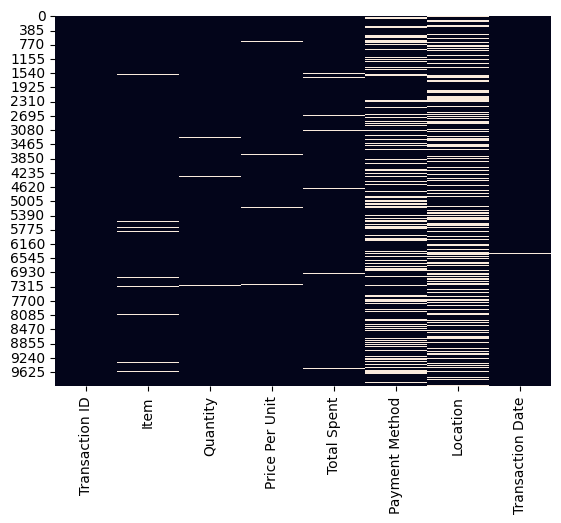

In [ ]:
# Visualisasi Data Yang Kosong
sns.heatmap(data.isnull(), cbar=False)
plt.show()

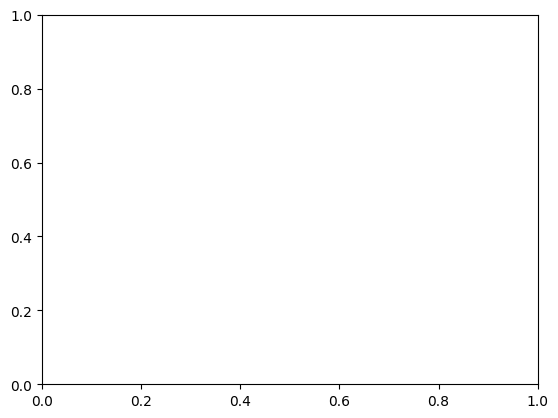

In [ ]:
# Boxplot untuk mendeteksi outlier
sns.boxplot(data=data)
plt.show()

Grafik di atas kosong dikarenakan data yang bersifat numerik masih tercantum sebagai data kategorikal, yang dimana untuk grafik boxplot hanya menerima data numerik

In [ ]:
# Cek Duplikasi Data
duplicates = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

Jumlah data duplikat: 0


# 3. Data Preparation

Tahap ini adalah yang paling krusial. Kita akan membersihkan data kotor yang ditemukan pada tahap sebelumnya agar model mesin bisa bekerja optimal.

##  Langkah Pembersihan:
1.  **Handling Inconsistent Data:** Mengubah paksa kolom `Quantity` dan `Price` menjadi angka. Nilai non-angka (seperti teks "ERROR") akan diubah menjadi `NaN` (Kosong).
2.  **Handling Missing Values:**
    * Menghapus baris jika data utama (ID Transaksi) hilang.
    * Mengisi data kategori yang hilang (seperti Lokasi) dengan label "Unknown" agar data tidak terbuang percuma.
3.  **Feature Engineering:** Membuat kolom baru `Calculated_Total_Spent` (Quantity × Price) untuk menjadi target prediksi.

In [ ]:
# Data Cleaning (Pembersihan Data)
print("\n === Memulai pembersihan data... ===")


 === Memulai pembersihan data... ===


In [ ]:
# a. Membersihkan Kolom Numerik (Quantity, Price Per Unit, Total Spent)
# Masalah: Kolom-kolom ini harusnya angka, tapi terbaca sebagai object karena berisi teks "kotor" seperti "ERROR", "UNKNOWN", atau mungkin spasi.

print("\n--- Membersihkan Kolom Numerik ---")
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

print(f"Tipe 'Quantity' sebelum: {data['Quantity'].dtype}")

for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(f"Tipe 'Quantity' sesudah: {data['Quantity'].dtype}")
print("Kolom 'ERROR' dan 'UNKNOWN' di kolom numerik kini telah diubah menjadi NaN.")


--- Membersihkan Kolom Numerik ---
Tipe 'Quantity' sebelum: object
Tipe 'Quantity' sesudah: float64
Kolom 'ERROR' dan 'UNKNOWN' di kolom numerik kini telah diubah menjadi NaN.


In [ ]:
# b. Mengonversi Kolom Tanggal (Transaction Date)
# Masalah: Kolom tanggal terbaca sebagai object

print("\n--- Mengonversi Kolom Tanggal ---")
print(f"Tipe 'Transaction Date' sebelum: {data['Transaction Date'].dtype}")

data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], errors='coerce')

print(f"Tipe 'Transaction Date' sesudah: {data['Transaction Date'].dtype}")


--- Mengonversi Kolom Tanggal ---
Tipe 'Transaction Date' sebelum: object
Tipe 'Transaction Date' sesudah: datetime64[ns]


In [ ]:
# c. Menstandarisasi Kolom Kategorikal (Item, Payment Method, Location)
# Masalah: Kolom teks sering tidak konsisten. "Coffee", " coffee ", "coffe", dan "UNKNOWN" adalah contohnya.

print("\n--- Menstandarisasi Kolom Kategorikal ---")
categorical_cols = ['Item', 'Payment Method', 'Location']

# Tampilkan contoh 'Item' yang unik sebelum dibersihkan
print(f"Contoh 'Item' unik sebelum: {data['Item'].unique()[:10]}...")

for col in categorical_cols:
    data[col] = data[col].str.lower().str.strip()
    data[col] = data[col].replace('unknown', np.nan) # Seragamkan semua yang "tidak diketahui"

# Perbaikan ejaan spesifik untuk kolom 'Item' (berdasarkan eksplorasi)
item_replacements = {
    'coffe': 'coffee',
    'coffeee': 'coffee',
    'exspresso': 'espresso',
    'capuccino': 'cappuccino'
}
data['Item'] = data['Item'].replace(item_replacements)

print(f"\nContoh 'Item' unik sesudah: {data['Item'].unique()[:10]}...")


--- Menstandarisasi Kolom Kategorikal ---
Contoh 'Item' unik sebelum: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice']...

Contoh 'Item' unik sesudah: ['coffee' 'cake' 'cookie' 'salad' 'smoothie' nan 'sandwich' 'error'
 'juice' 'tea']...


In [ ]:
# d. Menangani Nilai Hilang (NaN)
# Masalah: Langkah (a), (b), dan (c) telah menciptakan banyak NaN (nilai hilang) dari data yang kotor.

print("\n--- Menangani Nilai Hilang (NaN) ---")
print(f"Jumlah NaN sebelum ditangani:\n{data.isnull().sum()}")

# 1. Drop baris di mana data inti penjualan hilang
core_cols = ['Transaction Date', 'Item', 'Quantity', 'Price Per Unit']
data.dropna(subset=core_cols, inplace=True)

# 2. Impute (isi) data sekunder yang hilang
data['Payment Method'] = data['Payment Method'].fillna('unknown')
data['Location'] = data['Location'].fillna('unknown')

print(f"\nJumlah NaN sesudah ditangani:\n{data.isnull().sum()}")


--- Menangani Nilai Hilang (NaN) ---
Jumlah NaN sebelum ditangani:
Transaction ID         0
Item                 677
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2872
Location            3603
Transaction Date     460
dtype: int64

Jumlah NaN sesudah ditangani:
Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent         407
Payment Method        0
Location              0
Transaction Date      0
dtype: int64


In [ ]:
# Data Construction (Feature Engineering)
print("\n === Memulai pembuatan fitur... ===")


 === Memulai pembuatan fitur... ===


In [ ]:
# a. Validasi Integritas Data dan Perbaikan Total Spent
# Langkah Kritis: Kita punya Quantity, Price Per Unit, dan Total Spent. Kita harus memvalidasi apakah Quantity * Price Per Unit benar-benar sama dengan Total Spent

print("\n--- Validasi dan Perbaikan 'Total Spent' ---")

# Buat kolom perhitungan baru
data['Calculated_Total_Spent'] = data['Quantity'] * data['Price Per Unit']

# Cek berapa banyak baris yang tidak cocok (gunakan np.isclose untuk perbandingan float)
mismatched_rows = data[~np.isclose(data['Total Spent'], data['Calculated_Total_Spent'])]
print(f"Ditemukan {len(mismatched_rows)} baris dimana 'Total Spent' tidak cocok dengan 'Quantity * Price'.")

# Keputusan: Kita percaya perhitungan. Buat ulang 'Total Spent' agar konsisten.
data['Total Spent'] = data['Calculated_Total_Spent']
print("Kolom 'Total Spent' telah diperbaiki agar konsisten.")


--- Validasi dan Perbaikan 'Total Spent' ---
Ditemukan 407 baris dimana 'Total Spent' tidak cocok dengan 'Quantity * Price'.
Kolom 'Total Spent' telah diperbaiki agar konsisten.


In [ ]:
# b. Ekstraksi Fitur Waktu

print("\n--- Ekstraksi Fitur Waktu ---")
data['Month'] = data['Transaction Date'].dt.month_name()
data['DayOfWeek'] = data['Transaction Date'].dt.day_name()
data['Hour'] = data['Transaction Date'].dt.hour
print("Kolom 'Month', 'DayOfWeek', dan 'Hour' telah ditambahkan.")


--- Ekstraksi Fitur Waktu ---
Kolom 'Month', 'DayOfWeek', dan 'Hour' telah ditambahkan.


In [ ]:
# Data Formatting

print("\n--- Data Formatting ---")

# Tentukan urutan kolom yang kita inginkan
final_columns = [
    'Transaction ID', 'Transaction Date', 'Month', 'DayOfWeek', 'Hour',
    'Location', 'Item', 'Quantity', 'Price Per Unit', 'Total Spent',
    'Payment Method'
]

# Buat DataFrame bersih yang final
# .copy() digunakan untuk menghindari SettingWithCopyWarning
data_clean = data[final_columns].copy()

print("DataFrame telah diformat ulang.")


--- Data Formatting ---
DataFrame telah diformat ulang.


In [ ]:
# Normalisasi Data (Skala Nilai Numerik)
print("\n--- Normalisasi Data ---")

from sklearn.preprocessing import MinMaxScaler

# Tentukan kolom numerik yang akan dinormalisasi
numeric_cols = ['Quantity', 'Price Per Unit', 'Total Spent']

# Inisialisasi scaler Min-Max (skala 0–1)
scaler = MinMaxScaler()

# Salin data agar tidak merusak data asli
data_normalized = data_clean.copy()

# Terapkan normalisasi
data_normalized[numeric_cols] = scaler.fit_transform(data_clean[numeric_cols])

print("Data numerik berhasil dinormalisasi (skala 0–1).")
print(data_normalized.head())


--- Normalisasi Data ---
Data numerik berhasil dinormalisasi (skala 0–1).
  Transaction ID Transaction Date      Month  DayOfWeek  Hour  Location  \
0    TXN_1961373       2023-09-08  September     Friday     0  takeaway   
1    TXN_4977031       2023-05-16        May    Tuesday     0  in-store   
2    TXN_4271903       2023-07-19       July  Wednesday     0  in-store   
3    TXN_7034554       2023-04-27      April   Thursday     0   unknown   
4    TXN_3160411       2023-06-11       June     Sunday     0  in-store   

     Item  Quantity  Price Per Unit  Total Spent  Payment Method  
0  coffee      0.25            0.25     0.125000     credit card  
1    cake      0.75            0.50     0.458333            cash  
2  cookie      0.75            0.00     0.125000     credit card  
3   salad      0.25            1.00     0.375000         unknown  
4  coffee      0.25            0.25     0.125000  digital wallet  


In [ ]:
# One-Hot Encoding (Mengubah Data Kategorikal Menjadi Numerik)
print("\n--- One-Hot Encoding ---")

# Pilih kolom kategorikal yang ingin diubah
categorical_cols = ['Location', 'Item', 'Payment Method', 'DayOfWeek', 'Month']

# Terapkan one-hot encoding menggunakan pandas
data_encoded = pd.get_dummies(data_normalized, columns=categorical_cols, drop_first=True)

print("One-Hot Encoding selesai. Berikut tampilan kolom baru:")
print(data_encoded.head())
print(f"\nJumlah kolom setelah encoding: {data_encoded.shape[1]}")



--- One-Hot Encoding ---
One-Hot Encoding selesai. Berikut tampilan kolom baru:
  Transaction ID Transaction Date  Hour  Quantity  Price Per Unit  \
0    TXN_1961373       2023-09-08     0      0.25            0.25   
1    TXN_4977031       2023-05-16     0      0.75            0.50   
2    TXN_4271903       2023-07-19     0      0.75            0.00   
3    TXN_7034554       2023-04-27     0      0.25            1.00   
4    TXN_3160411       2023-06-11     0      0.25            0.25   

   Total Spent  Location_in-store  Location_takeaway  Location_unknown  \
0     0.125000              False               True             False   
1     0.458333               True              False             False   
2     0.125000               True              False             False   
3     0.375000              False              False              True   
4     0.125000               True              False             False   

   Item_coffee  ...  Month_December  Month_February  Month_

In [ ]:
# Kolom yang di-encode
categorical_cols = ['Location', 'Item', 'Payment Method', 'DayOfWeek', 'Month']

print("Kolom yang di-encode:")
for col in categorical_cols:
    print("-", col)

# Menampilkan kolom baru setelah One-Hot Encoding
print("\nKolom baru hasil encoding:")
encoded_columns = [c for c in data_encoded.columns if any(cc in c for cc in categorical_cols)]
for col in encoded_columns:
    print("-", col)


Kolom yang di-encode:
- Location
- Item
- Payment Method
- DayOfWeek
- Month

Kolom baru hasil encoding:
- Location_in-store
- Location_takeaway
- Location_unknown
- Item_coffee
- Item_cookie
- Item_error
- Item_juice
- Item_salad
- Item_sandwich
- Item_smoothie
- Item_tea
- Payment Method_credit card
- Payment Method_digital wallet
- Payment Method_error
- Payment Method_unknown
- DayOfWeek_Monday
- DayOfWeek_Saturday
- DayOfWeek_Sunday
- DayOfWeek_Thursday
- DayOfWeek_Tuesday
- DayOfWeek_Wednesday
- Month_August
- Month_December
- Month_February
- Month_January
- Month_July
- Month_June
- Month_March
- Month_May
- Month_November
- Month_October
- Month_September


# Exploratory Data Analysis (EDA)

Kita akan menjawab pertanyaan bisnis menggunakan visualisasi data.


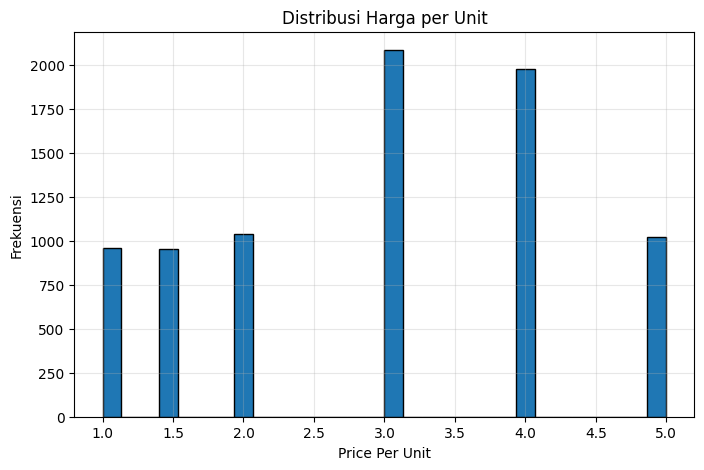

In [ ]:
# 1 Histogram: Distribusi Harga per Unit
# Menunjukkan sebaran atau distribusi harga per unit di seluruh transaksi.
plt.figure(figsize=(8,5))
plt.hist(data_clean['Price Per Unit'], bins=30, edgecolor='black')
plt.title('Distribusi Harga per Unit')
plt.xlabel('Price Per Unit')
plt.ylabel('Frekuensi')
plt.grid(alpha=0.3)
plt.show()

Tujuan dari histogram tersebut adalah
1. Melihat Sebaran Harga per Unit

Histogram menunjukkan bagaimana nilai harga per unit tersebar dalam dataset — apakah banyak transaksi berada pada harga murah, sedang, atau mahal.

2. Mengetahui Pola Distribusi

Dari grafik kamu bisa melihat apakah distribusinya:

Normal (membentuk lonceng)

Condong ke kiri/kanan (skewed)

Mengandung outlier (harga yang sangat tinggi/ rendah)

3. Mengidentifikasi Harga yang Paling Sering Muncul

Histogram membantu melihat rentang harga mana yang paling sering terjadi, misalnya harga 0.5–1.0 sering muncul.

4. Memudahkan Analisis Awal (EDA)

Histogram adalah bagian dari Exploratory Data Analysis, yang digunakan sebelum model dibuat, untuk memahami karakteristik data.

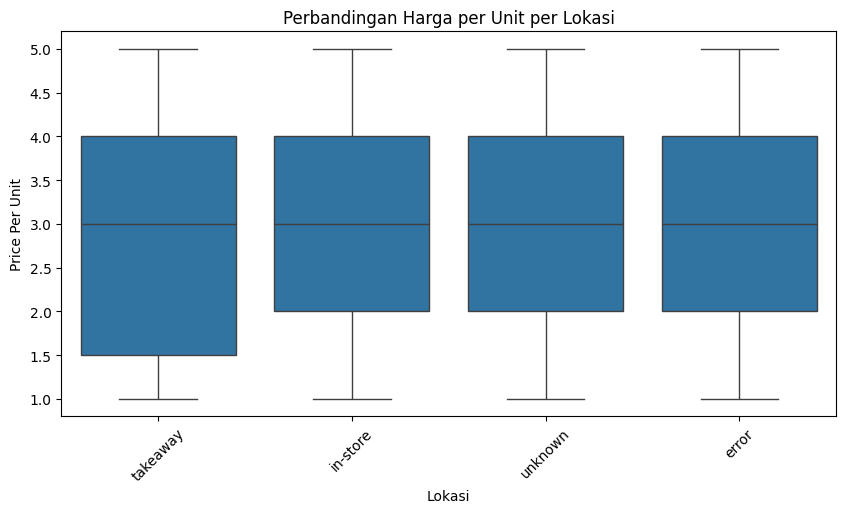

In [ ]:
# 2 Boxplot: Perbandingan Harga per Lokasi
# Membandingkan variasi dan outlier harga per unit antar lokasi penjualan.
plt.figure(figsize=(10,5))
sns.boxplot(data=data_clean, x='Location', y='Price Per Unit')
plt.title('Perbandingan Harga per Unit per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45)
plt.show()

Tujuan dari box plot tersebut adalah untuk mengetahui outlier

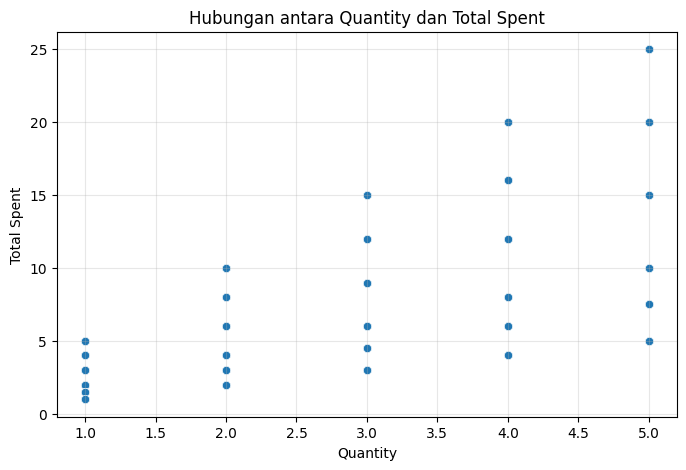

In [ ]:
# 3 Scatter Plot: Hubungan Quantity dan Total Spent
# Menunjukkan hubungan antara jumlah barang yang dibeli dan total pengeluaran.
plt.figure(figsize=(8,5))
sns.scatterplot(data=data_clean, x='Quantity', y='Total Spent')
plt.title('Hubungan antara Quantity dan Total Spent')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.grid(alpha=0.3)
plt.show()

Menunjukkan hubungan antara jumlah barang yang dibeli dan total pengeluaran.

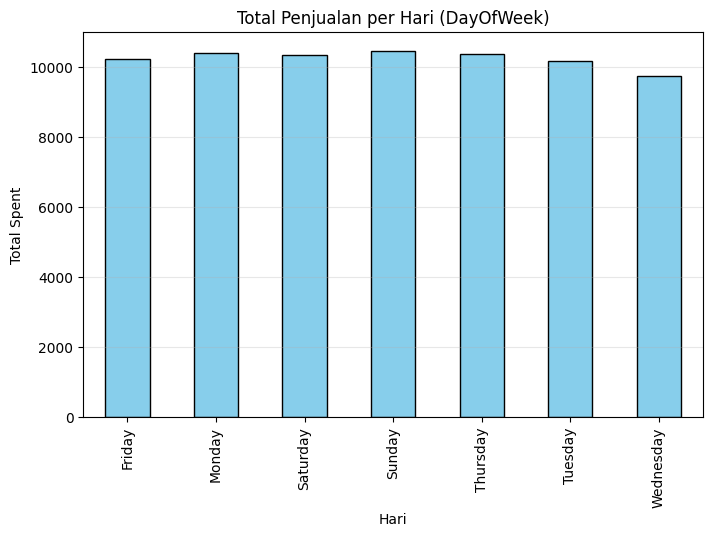

In [ ]:
# 4 Bar Chart: Total Penjualan per Hari
# Menampilkan total penjualan pada setiap hari untuk melihat pola pembelian.
sales_per_day = data_clean.groupby('DayOfWeek')['Total Spent'].sum().sort_index()
plt.figure(figsize=(8,5))
sales_per_day.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Penjualan per Hari (DayOfWeek)')
plt.xlabel('Hari')
plt.ylabel('Total Spent')
plt.grid(axis='y', alpha=0.3)
plt.show()


Menampilkan total penjualan pada setiap hari untuk melihat pola pembelian.

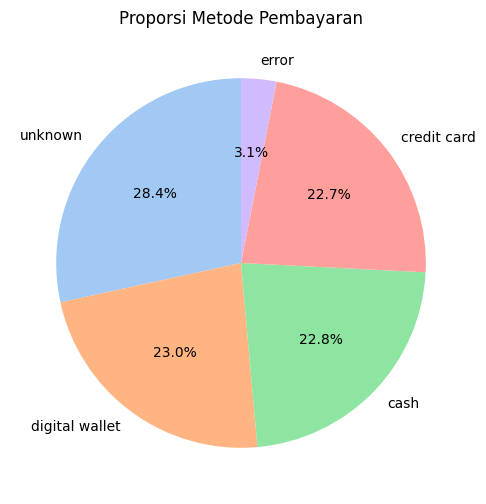

In [ ]:
# 5 Pie Chart: Proporsi Metode Pembayaran
# Memperlihatkan proporsi penggunaan setiap metode pembayaran oleh pelanggan.
plt.figure(figsize=(6,6))
data_clean['Payment Method'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Proporsi Metode Pembayaran')
plt.ylabel('')
plt.show()

Memperlihatkan proporsi penggunaan setiap metode pembayaran oleh pelanggan.

In [ ]:
# Menyimpan Hasil Akhir ke File CSV
print("\n--- Menyimpan Hasil Akhir ---")

# Simpan DataFrame hasil akhir (yang sudah di-encode dan dinormalisasi)
data_encoded.to_csv('clean_data_sales.csv', index=False)

print("✅ File 'clean_data_sales.csv' berhasil disimpan.")
print("\nMenampilkan 5 data teratas dari file baru:")

# Baca ulang untuk memastikan hasil tersimpan dengan benar
hasil_akhir = pd.read_csv('clean_data_sales.csv')
print(hasil_akhir.head())


--- Menyimpan Hasil Akhir ---
✅ File 'clean_data_sales.csv' berhasil disimpan.

Menampilkan 5 data teratas dari file baru:
  Transaction ID Transaction Date  Hour  Quantity  Price Per Unit  \
0    TXN_1961373       2023-09-08     0      0.25            0.25   
1    TXN_4977031       2023-05-16     0      0.75            0.50   
2    TXN_4271903       2023-07-19     0      0.75            0.00   
3    TXN_7034554       2023-04-27     0      0.25            1.00   
4    TXN_3160411       2023-06-11     0      0.25            0.25   

   Total Spent  Location_in-store  Location_takeaway  Location_unknown  \
0     0.125000              False               True             False   
1     0.458333               True              False             False   
2     0.125000               True              False             False   
3     0.375000              False              False              True   
4     0.125000               True              False             False   

   Item_coffee  

In [ ]:
print("\n--- HASIL AKHIR DATA PREPARATION ---")
print("Info Data Bersih:")
data_clean.info()


print("\nContoh 5 baris data bersih:")
print(data_clean.head())


--- HASIL AKHIR DATA PREPARATION ---
Info Data Bersih:
<class 'pandas.core.frame.DataFrame'>
Index: 8030 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8030 non-null   object        
 1   Transaction Date  8030 non-null   datetime64[ns]
 2   Month             8030 non-null   object        
 3   DayOfWeek         8030 non-null   object        
 4   Hour              8030 non-null   int32         
 5   Location          8030 non-null   object        
 6   Item              8030 non-null   object        
 7   Quantity          8030 non-null   float64       
 8   Price Per Unit    8030 non-null   float64       
 9   Total Spent       8030 non-null   float64       
 10  Payment Method    8030 non-null   object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(6)
memory usage: 721.4+ KB

Contoh 5 baris data bersih:
  Transaction ID Transaction

# 4. Modeling (Pembuatan Model)

Pada tahap ini, kita akan melatih komputer untuk memprediksi `Total Spent` (Total Belanja) berdasarkan data yang sudah dipelajari.

### 4a. Mengapa Linear Regression?
Kami memilih **Linear Regression** karena sederhana dan mudah dipahami.
* **Logika Simpel:** Model ini mencoba menarik satu "Garis Lurus" (Best Fit Line) yang paling mewakili pola belanja pelanggan.
* **Tujuan:** Meminimalkan jarak error antara garis prediksi dengan data asli.

> **Ilustrasi Konsep:**
> Bayangkan kita menarik garis lurus di antara titik-titik data penjualan. Semakin dekat titik data ke garis, semakin akurat prediksinya.

---
### ⚙️ Konfigurasi Model
Untuk memastikan pengujian yang adil, kami melakukan pengaturan berikut:

| Parameter | Konfigurasi | Alasan |
| :--- | :--- | :--- |
| **Algoritma** | Linear Regression | Cocok untuk data dengan pola hubungan langsung (linear). |
| **Data Training** | 80% | Data untuk model "belajar". |
| **Data Testing** | 20% | Data untuk "ujian" (evaluasi). |
| **Target** | `Total Spent` | Nilai yang ingin diprediksi. |

---

In [ ]:
# ============================================================
# 1. PERSIAPAN DATA
# ============================================================

# Target dan fitur
X = data_encoded.drop(["Total Spent", "Transaction ID", "Transaction Date"], axis=1, errors='ignore')
y = data_encoded["Total Spent"]

# Split data 80 : 20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def evaluate(model_name, y_test, y_pred, r2_dict):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {model_name} =====")
    print("MAE  :", round(mae, 4))
    print("MSE  :", round(mse, 4))
    print("RMSE :", round(rmse, 4))
    print("R²   :", round(r2, 4))

    r2_dict[model_name] = r2
r2_results = {}


In [ ]:
# ============================================================
# 2. Regresi Linear Sederhana
# ============================================================
print("\n--- Regresi Linear: Prediksi Total Spent ---")

# 1. Tentukan fitur (X) dan target (y)
X = data_encoded[['Quantity', 'Price Per Unit']]
y = data_encoded['Total Spent']

# 2. Bagi data menjadi data latih dan uji (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat dan latih model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Prediksi pada data uji
y_pred = model.predict(X_test)

# 5. Evaluasi hasil regresi
print("\n--- Evaluasi Model ---")
print(f"MAE  (Mean Absolute Error): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE  (Mean Squared Error): {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²   (Koefisien Determinasi): {r2_score(y_test, y_pred):.2f}")

# 6. Tampilkan hasil prediksi sampel
hasil = pd.DataFrame({
    'Quantity': X_test['Quantity'],
    'Price Per Unit': X_test['Price Per Unit'],
    'Actual Total': y_test,
    'Predicted Total': y_pred
})
print("\nContoh hasil prediksi:")
print(hasil.head(10))



--- Regresi Linear: Prediksi Total Spent ---

--- Evaluasi Model ---
MAE  (Mean Absolute Error): 0.05
MSE  (Mean Squared Error): 0.01
R²   (Koefisien Determinasi): 0.91

Contoh hasil prediksi:
      Quantity  Price Per Unit  Actual Total  Predicted Total
7549      0.25            0.75      0.291667         0.334981
7413      1.00            0.25      0.375000         0.454943
3830      0.00            1.00      0.166667         0.336679
8008      0.75            0.00      0.125000         0.206525
417       0.25            0.75      0.291667         0.334981
5760      0.25            1.00      0.375000         0.460039
4217      0.00            0.50      0.083333         0.086563
4520      0.25            0.25      0.125000         0.084864
4954      1.00            0.75      0.791667         0.705060
7375      0.50            0.75      0.458333         0.458340


In [ ]:
# ============================================================
# 3. REGRESI LINEAR BERGANDA
# ============================================================

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Prediksi
y_pred_linear = model_linear.predict(X_test)

# Evaluasi model (PERBAIKAN: tambahkan r2_results)
evaluate("Regresi Linear Berganda", y_test, y_pred_linear, r2_results)

# Menampilkan koefisien regresi
coef_df = pd.DataFrame({
    'Fitur': X.columns,
    'Koefisien': model_linear.coef_
}).sort_values(by="Koefisien", ascending=False)

print("\nKoefisien Regresi Linear:")
print(coef_df.head(10))



===== Regresi Linear Berganda =====
MAE  : 0.0536
MSE  : 0.0058
RMSE : 0.0762
R²   : 0.9097

Koefisien Regresi Linear:
            Fitur  Koefisien
1  Price Per Unit   0.500234
0        Quantity   0.493439


In [ ]:
# ============================================================
# 4. REGRESI RIDGE
# ============================================================

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

y_pred_ridge = model_ridge.predict(X_test)

# PERBAIKAN: tambahkan r2_results
evaluate("Ridge Regression", y_test, y_pred_ridge, r2_results)



===== Ridge Regression =====
MAE  : 0.0536
MSE  : 0.0058
RMSE : 0.0762
R²   : 0.9096


In [ ]:
# ============================================================
# 5. REGRESI LASSO
# ============================================================

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

# PERBAIKAN: tambah r2_results
evaluate("Lasso Regression", y_test, y_pred_lasso, r2_results)



===== Lasso Regression =====
MAE  : 0.0547
MSE  : 0.0059
RMSE : 0.0765
R²   : 0.9089


In [ ]:
# ============================================================
# 6. POLYNOMIAL REGRESSION (DEGREE 2)
# ============================================================

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split ulang data polynomial
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_poly_train)

y_pred_poly = model_poly.predict(X_poly_test)

evaluate("Polynomial Regression (Degree 2)", y_poly_test, y_pred_poly, r2_results)



===== Polynomial Regression (Degree 2) =====
MAE  : 0.0
MSE  : 0.0
RMSE : 0.0
R²   : 1.0


# Penjelasan Detail Model Regresi

Berikut adalah rincian metode yang digunakan ini:

---

### 1. Regresi Linear Berganda
Metode statistik dasar yang menggunakan beberapa variabel input sekaligus.

**a.  Tujuan**
* Menganalisis pengaruh lebih dari satu variabel terhadap `Total Spent`.
* Menangkap hubungan linear antara fitur (*Quantity, Price, Location*, dsb.) dengan target.
* Mengetahui fitur mana yang paling berpengaruh melalui nilai koefisien.

**b.  Cara Kerja**
Model membuat persamaan linear sebagai berikut:
$$\text{Total Spent} = a_1X_1 + a_2X_2 + ... + b$$
*Setiap koefisien ($a$) menunjukkan kekuatan dan arah pengaruh variabel terhadap target.*

**c.  Kelebihan**
* Sangat mudah diinterpretasi.
* Proses training cepat dan stabil.
* Memberikan gambaran jelas tentang hubungan linear antar variabel.

---

### 2. Ridge Regression (L2 Regularization)
Varian regresi linear yang dimodifikasi untuk menangani data kompleks.

**a.  Tujuan**
* Mengatasi *overfitting* pada data dengan banyak fitur (terutama hasil *one-hot encoding*).
* Menstabilkan model ketika terjadi multikolinearitas (antar variabel saling berhubungan kuat).

**b.  Cara Kerja**
Menambah "hukuman" (penalty) tipe L2 pada rumus error:
$$\text{Loss} = \text{Error} + \alpha \sum (\text{koefisien}^2)$$
*Efeknya: Koefisien yang nilainya terlalu besar akan ditekan menjadi kecil agar model lebih stabil.*

**c.  Kelebihan**
* Lebih stabil daripada regresi linear biasa.
* Mencegah model menghafal data (*overfitting*).
* Sangat cocok untuk dataset dengan banyak fitur *dummy*.

---

### 3. Lasso Regression (L1 Regularization)
Varian regresi yang bisa melakukan seleksi fitur secara otomatis.

**a.  Tujuan**
* Mengurangi *overfitting* sekaligus menyeleksi fitur terpenting.
* Menghapus fitur yang dianggap tidak berpengaruh (membuat koefisien jadi 0).

**b.  Cara Kerja**
Menambah "hukuman" (penalty) tipe L1:
$$\text{Loss} = \text{Error} + \alpha \sum |\text{koefisien}|$$
*Efeknya: Penalti ini dapat memaksa sebagian koefisien turun drastis hingga menjadi 0.*

**c.  Kelebihan**
* Menghasilkan model yang lebih sederhana (*sparse*).
* Mempermudah interpretasi karena fitur tidak penting otomatis hilang.
* Otomatis membuang *noise* pada data.

---

### 4. Polynomial Regression (Degree 2)
Teknik untuk menangkap pola data yang melengkung (tidak lurus).

**a.  Tujuan**
* Menangkap hubungan **non-linear** antara fitur dan target.
* Menambahkan dimensi baru ($X^2$, $X_1 \cdot X_2$) agar model dapat memahami pola yang lebih kompleks.

**b.  Cara Kerja**
Mengubah fitur input menjadi:
1.  **Pangkat Dua:** ($X^2$)
2.  **Interaksi:** Perkalian antar fitur ($X_1 \cdot X_2$)
*Setelah fitur bertambah, model tetap menggunakan prinsip regresi linear untuk training.*

**c.  Kelebihan**
* Mampu menangkap pola gelombang/lengkungan data.
* Jauh lebih fleksibel dibanding regresi linear biasa.
* Dapat meningkatkan akurasi signifikan jika hubungan data memang tidak linear.

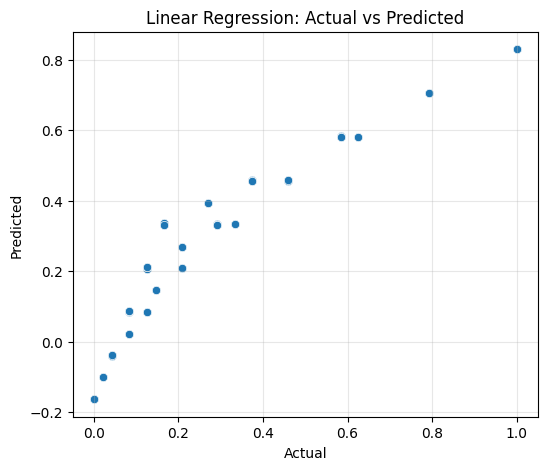

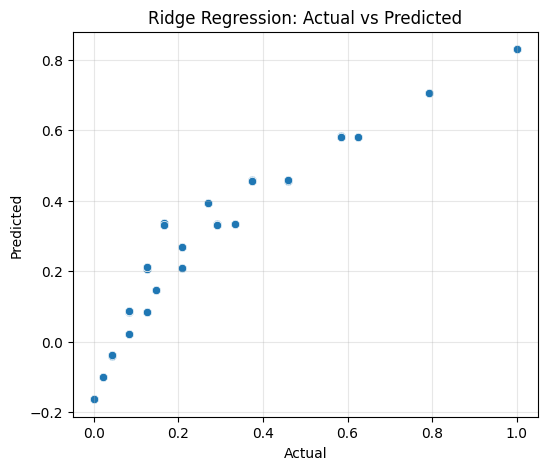

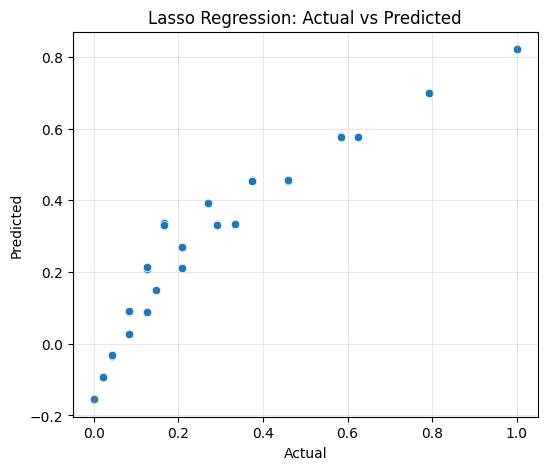

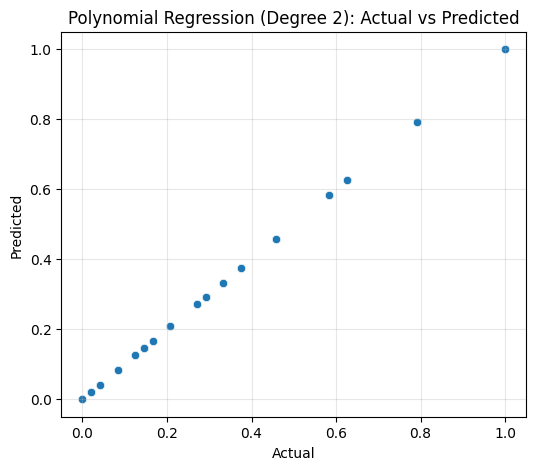

In [ ]:
# ============================================================
# 1. GRAFIK: ACTUAL vs PREDICTED
# ============================================================

def plot_actual_vs_pred(y_true, y_pred, title):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()

plot_actual_vs_pred(y_test, y_pred_linear, "Linear Regression: Actual vs Predicted")
plot_actual_vs_pred(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted")
plot_actual_vs_pred(y_test, y_pred_lasso, "Lasso Regression: Actual vs Predicted")
plot_actual_vs_pred(y_poly_test, y_pred_poly, "Polynomial Regression (Degree 2): Actual vs Predicted")

# Analisis Visual: Prediksi vs Aktual

Grafik *scatter plot* ini membandingkan **Nilai Prediksi Model** (sumbu Y) dengan **Nilai Aktual/Asli** (sumbu X). Garis diagonal merah (jika ada) merepresentasikan kondisi ideal di mana Prediksi = Aktual.

Berikut adalah 5 fungsi utama grafik ini:

---

### 1. Mengukur Akurasi Visual
* **Mendekati Garis Diagonal:** Jika titik-titik berkumpul rapat di sekitar garis diagonal ($y=x$), artinya prediksi model **sangat akurat**.
* **Menyebar Jauh:** Jika titik-titik tersebar acak menjauhi garis, artinya error model cukup besar.

### 2. Menilai Kualitas Prediksi
Grafik ini membantu kita menjawab pertanyaan:
* Apakah model cenderung menebak **terlalu tinggi** (*overestimation*)?
* Apakah model cenderung menebak **terlalu rendah** (*underestimation*)?
* Apakah ada pola error tertentu pada rentang harga tertentu?

### 3. Deteksi Underfitting vs Overfitting
* **Titik Berantakan (Acak):** Indikasi **Underfitting** (Model belum belajar pola dengan baik).
* **Titik Terlalu Sempurna (Lurus total):** Hati-hati, bisa jadi **Overfitting** (Model menghafal jawaban).
* **Titik Rapi tapi Wajar:** Model **Good Fit** (Cukup baik).

### 4. Membandingkan Performa Model
Kita bisa melihat sebaran titik dari berbagai model:
* **Polynomial Regression:** Cenderung lebih fleksibel (melengkung) mengikuti pola data non-linear.
* **Ridge / Lasso:** Biasanya titik-titiknya lebih rapat dan stabil karena adanya regularisasi.
* *Mana yang titiknya paling "memeluk" garis diagonal, itulah model terbaik.*

### 5. Memastikan Bias
Kita memeriksa konsistensi prediksi:
* Jika pola diagonal terlihat jelas dari nilai kecil hingga besar, berarti **Bias Rendah**.
* Jika model hanya akurat di nilai kecil tapi melenceng di nilai besar, berarti ada bias pada data nominal tinggi.

---
> **Kesimpulan:**
> Semakin rapat titik-titik data ke garis diagonal 45 derajat, semakin terpercaya model tersebut untuk digunakan.

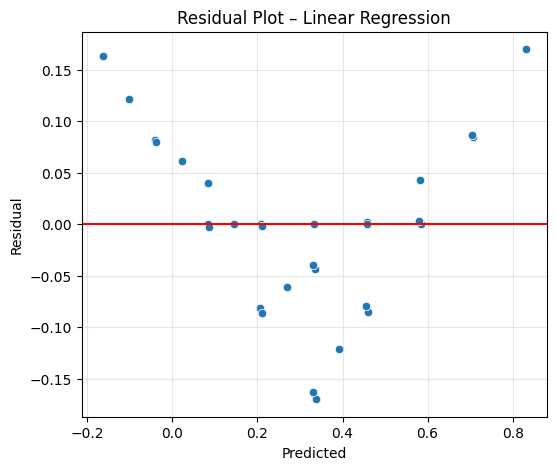

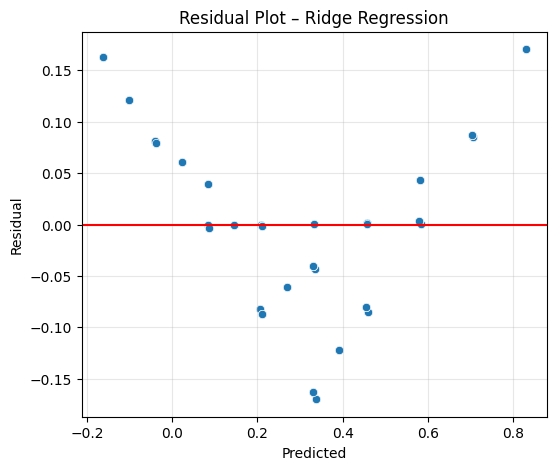

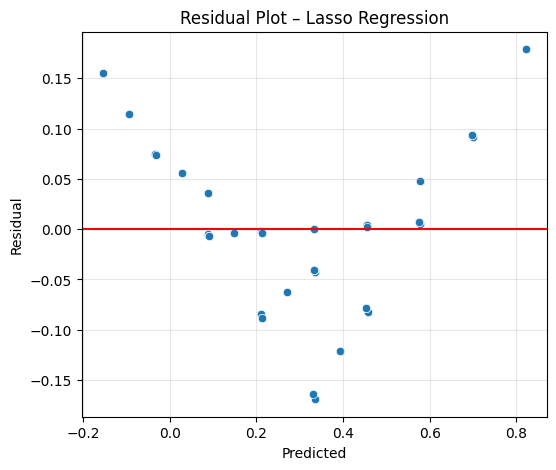

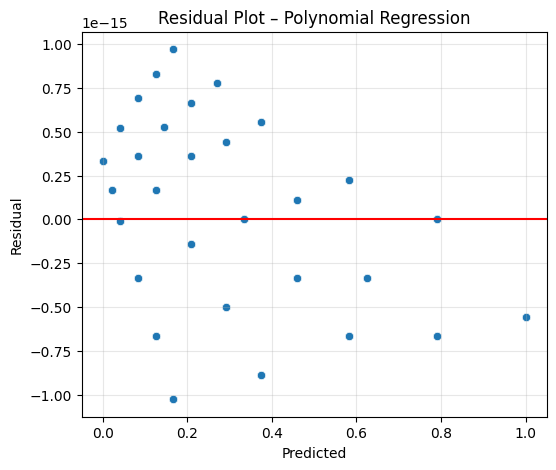

In [ ]:
# ============================================================
# 2. GRAFIK: RESIDUAL PLOT
# ============================================================

def plot_residual(y_true, y_pred, title):
    residual = y_true - y_pred
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_pred, y=residual)
    plt.axhline(0, color='red')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()

plot_residual(y_test, y_pred_linear, "Residual Plot – Linear Regression")
plot_residual(y_test, y_pred_ridge, "Residual Plot – Ridge Regression")
plot_residual(y_test, y_pred_lasso, "Residual Plot – Lasso Regression")
plot_residual(y_poly_test, y_pred_poly, "Residual Plot – Polynomial Regression")

# Analisis Residual Plot (Evaluasi Error)

**Residual Plot** adalah alat diagnostik untuk melihat selisih antara nilai asli dan nilai prediksi.
> **Rumus:** $\text{Residual} = \text{Actual} - \text{Predicted}$

Grafik ini berfungsi sebagai "Check-Up Kesehatan" model dengan 5 indikator utama:

---

### 1. Memeriksa Ketepatan Model (Good Fit)
Kita melihat sebaran titik di sekitar garis nol (garis tengah horizontal).
* **Menyebar Acak (Random):** ✅ **Model Sehat.** Artinya model sudah berhasil menangkap seluruh pola informasi dari data.
* **Membentuk Pola Tertentu:** ❌ **Model Kurang Tepat.** Masih ada pola data yang gagal ditangkap oleh model.

### 2. Mendeteksi Masalah Non-Linearitas
Jika titik residual membentuk pola **Kurva, Gelombang, atau Garis Lengkung**:
* **Diagnosa:** Model Linear tidak mampu menangkap hubungan data yang sebenarnya (Underfitting).
* **Solusi:** Pertimbangkan menggunakan **Polynomial Regression** untuk menangkap pola lengkungan tersebut.



### 3. Menilai Sebaran Error
Grafik ini memperlihatkan konsistensi kesalahan prediksi:
* Apakah error hanya besar di nilai tertentu?
* Apakah error menumpuk di satu sisi?
* **Target Ideal:** Error harus menyebar merata (konsisten) di sepanjang sumbu X.

### 4. Mendeteksi Heteroskedastisitas
Ini adalah istilah statistik untuk kondisi di mana error **membesar atau mengecil** seiring naiknya angka prediksi.
* **Ciri Visual:** Titik-titik membentuk pola **"Corong"** (melebar ke kanan/kiri).
* **Arti:** Model menjadi bias (tidak akurat) pada nilai-nilai yang besar.

### 5. Mendeteksi Outlier
* **Ciri Visual:** Titik yang berada **sangat jauh** di atas atau di bawah kumpulan titik lainnya.
* **Tindakan:** Data ini perlu diperiksa. Apakah ini data anomali yang perlu dibuang, atau memang kejadian nyata yang unik?

---
> **Kesimpulan:**
> Residual Plot yang baik terlihat seperti **"Awan Acak"** tanpa pola yang jelas, tersebar merata di sekitar garis nol.

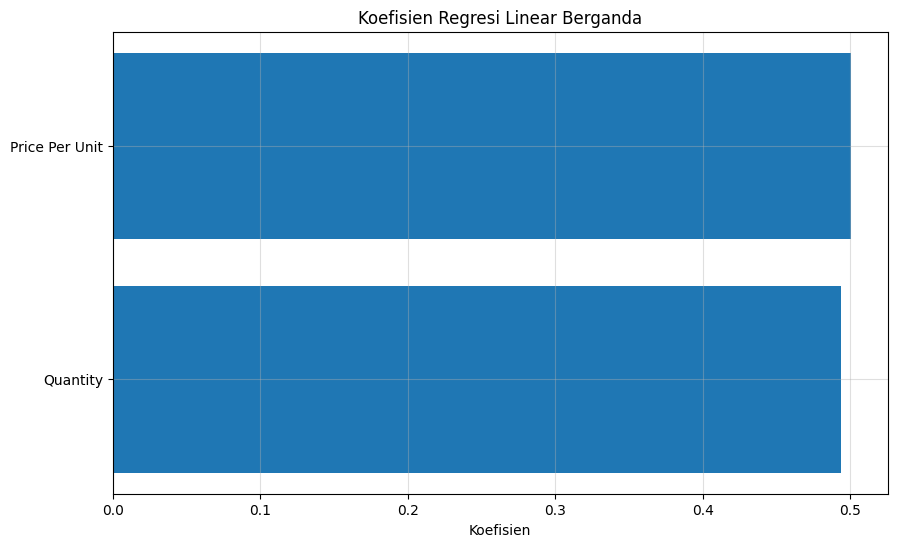

In [ ]:
# ============================================================
# 3. GRAFIK: KOEFISIEN REGRESI LINEAR BERGANDA
# ============================================================

plt.figure(figsize=(10,6))
plt.barh(coef_df["Fitur"], coef_df["Koefisien"])
plt.title("Koefisien Regresi Linear Berganda")
plt.xlabel("Koefisien")
plt.grid(alpha=0.4)
plt.gca().invert_yaxis()
plt.show()

# Analisis Koefisien Fitur (Feature Importance)

Grafik batang (*horizontal bar chart*) di atas memvisualisasikan seberapa besar pengaruh setiap fitur (variabel independen) terhadap target kita, yaitu `Total Spent`.

Berikut adalah panduan cara membaca grafik ini:

---

### 1. Mengetahui Fitur Paling Berpengaruh
Panjang setiap batang menunjukkan nilai **Koefisien** dari fitur tersebut.
* **Besar Kecilnya Nilai:** Semakin panjang batangnya (baik ke kanan maupun ke kiri), semakin kuat fitur tersebut memengaruhi total belanja.
* **Fitur Dominan:** Fitur dengan batang terpanjang adalah faktor penentu utama dalam prediksi model.

### 2. Memahami Arah Hubungan (Positif vs Negatif)
Warna atau arah batang menunjukkan sifat hubungannya:
* **Koefisien Positif (+):** Berbanding Lurus.
    > *Contoh:* Jika `Quantity` naik, maka `Total Spent` ikut **naik**.
* **Koefisien Negatif (-):** Berbanding Terbalik.
    > *Contoh:* Jika nilai fitur naik, `Total Spent` justru **turun**.
* **Mendekati Nol:** Pengaruhnya sangat kecil atau tidak signifikan.

### 3. Membantu Interpretasi Bisnis
Grafik ini sangat berguna untuk pengambilan keputusan karena memudahkan kita untuk:
* **Ranking Fitur:** Langsung terlihat mana yang "Penting" dan mana yang "Remeh".
* **Perbandingan Kategori:** Membandingkan dampak antar kategori (misal: apakah *Location A* lebih menguntungkan daripada *Location B*?).
* **Validasi Intuisi:** Apakah hasil ini masuk akal secara bisnis? (Misal: Wajar jika *Quantity* berpengaruh besar).

### 4. Mendeteksi Fitur Tidak Penting
Jika ada batang yang sangat pendek (koefisien sangat kecil mendekati 0):
* **Indikasi:** Fitur tersebut mungkin tidak relevan.
* **Tindak Lanjut:** Fitur ini bisa dipertimbangkan untuk dibuang (*drop*) atau digunakan metode seleksi fitur otomatis seperti **Lasso Regression** agar model lebih ringkas.

---
> **Kesimpulan:**
> Fokuskan strategi bisnis Anda pada fitur-fitur dengan koefisien terbesar (batang terpanjang), karena itulah tuas penggerak utama pendapatan Anda.

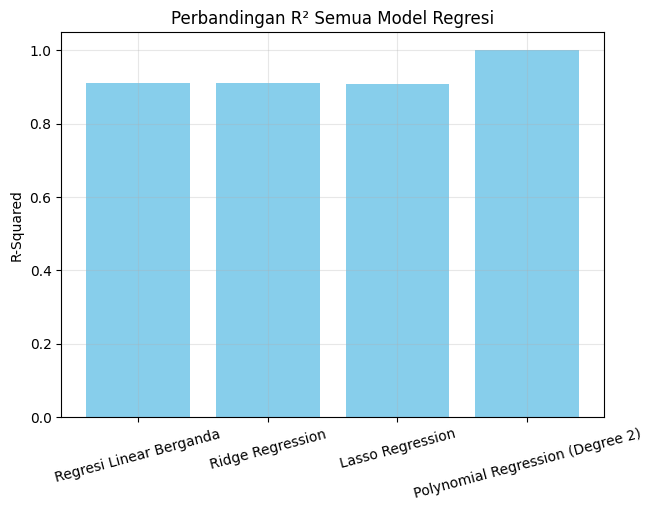

In [ ]:
# ============================================================
# 4. GRAFIK: PERBANDINGAN R-SQUARED SEMUA MODEL
# ============================================================

plt.figure(figsize=(7,5))
plt.bar(r2_results.keys(), r2_results.values(), color='skyblue')
plt.ylabel("R-Squared")
plt.title("Perbandingan R² Semua Model Regresi")
plt.xticks(rotation=15)
plt.grid(alpha=0.3)
plt.show()

# Perbandingan Model: Analisis R² Score

Grafik batang di atas menampilkan nilai **R² (R-Squared)** dari setiap model yang telah kita uji.
> **Definisi:** R² adalah skor (0-1) yang menunjukkan seberapa baik model mampu menjelaskan pola data. Semakin mendekati 1, semakin akurat modelnya.

Berikut adalah cara membaca grafik perbandingan ini:

---

### 1. Membandingkan Kinerja Semua Model
Grafik ini secara instan memperlihatkan peringkat model:
* **Batang Tertinggi:** Model yang paling akurat (Juara).
* **Batang Terendah:** Model dengan performa kurang optimal.
* **Keseimbangan:** Kita bisa melihat model mana yang punya keseimbangan terbaik antara kompleksitas dan akurasi.

### 2. Menentukan Model Terbaik
Dari visualisasi ini, kita bisa menyimpulkan:
* Apakah model kompleks (**Polynomial Regression**) memberikan peningkatan akurasi yang signifikan dibandingkan model sederhana?
* Apakah teknik regularisasi (**Ridge/Lasso**) berhasil menjaga akurasi sambil mencegah *overfitting*?

### 3. Visualisasi Cepat & Jelas
*Bar plot* dipilih karena sangat efektif untuk presentasi laporan:
* **Mudah Dipahami:** Dosen atau Manajer bisa langsung tahu model mana yang terbaik hanya dalam sekali lihat.
* **Komparasi Langsung:** Perbedaan kecil antar model akan terlihat jelas dari tinggi rendahnya batang.

### 4. Evaluasi Dampak Kompleksitas
Grafik ini juga menceritakan hubungan antara kerumitan model dan hasil:
* **Linear Regression:** Model paling sederhana.
* **Ridge/Lasso:** Model stabil dengan penalti error.
* **Polynomial:** Model kompleks (non-linear).
* **Decision Tree:** Model berbasis aturan logika.

> **Analisis:**
> * Jika R² **Naik** pada model kompleks → Kompleksitas tambahan itu berguna.
> * Jika R² **Turun/Sama** → Model sederhana lebih disarankan (prinsip *Occam's Razor*).

---
> **Kesimpulan Akhir:**
> Pilihlah model dengan R² tertinggi, namun tetap pertimbangkan kestabilannya (lihat selisih antara Training vs Testing score jika ada).

# 4b. Modeling Eksperimen: Decision Tree

Selain Linear Regression, kami juga melakukan eksperimen menggunakan **Decision Tree**.

###  Mengapa Decision Tree?
Jika Linear Regression mencari "garis lurus", Decision Tree mencari "pola keputusan" bertingkat.
* **Tujuan Utama:** Memahami **Fitur Apa yang Paling Penting?** (Feature Importance).
* **Kelebihan:** Hasilnya bisa divisualisasikan seperti *Flowchart*, sehingga kita bisa melihat logika di balik prediksi komputer.

### Konfigurasi Model Tree
| Parameter | Setting | Alasan |
| :--- | :--- | :--- |
| **Max Depth** | 2 | Agar pohon tidak terlalu rimbun/rumit, sehingga mudah dibaca manusia. |
| **Random State** | 42 | Agar hasil eksperimen konsisten (tidak berubah-ubah). |

---

Menyiapkan data...
Melatih model Decision Tree...

--- Evaluasi Model Decision Tree ---
MAE  (Mean Absolute Error): 0.00
MSE  (Mean Squared Error): 0.00
R²   (Koefisien Determinasi): 1.00

--- Menghitung Feature Importance ---


            Fitur  Pentingnya (Score)
0        Quantity            0.507597
1  Price Per Unit            0.492403


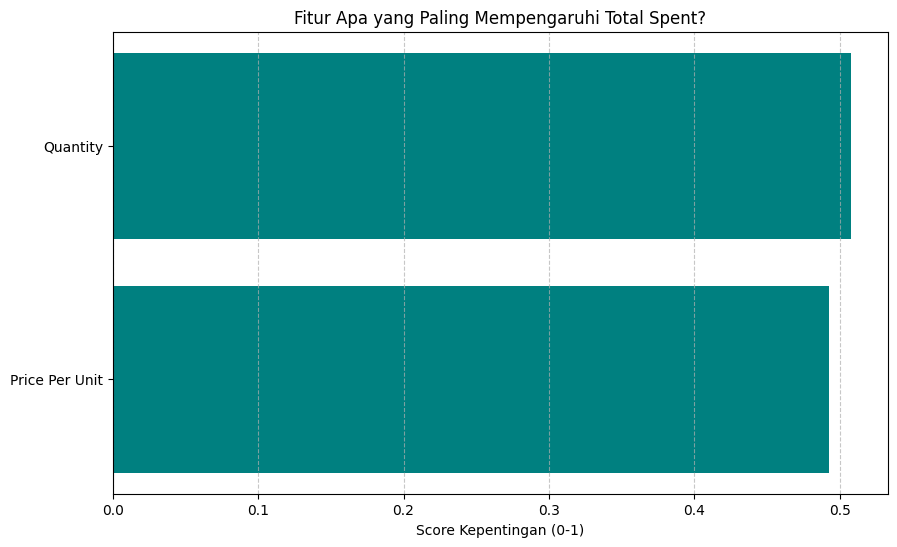

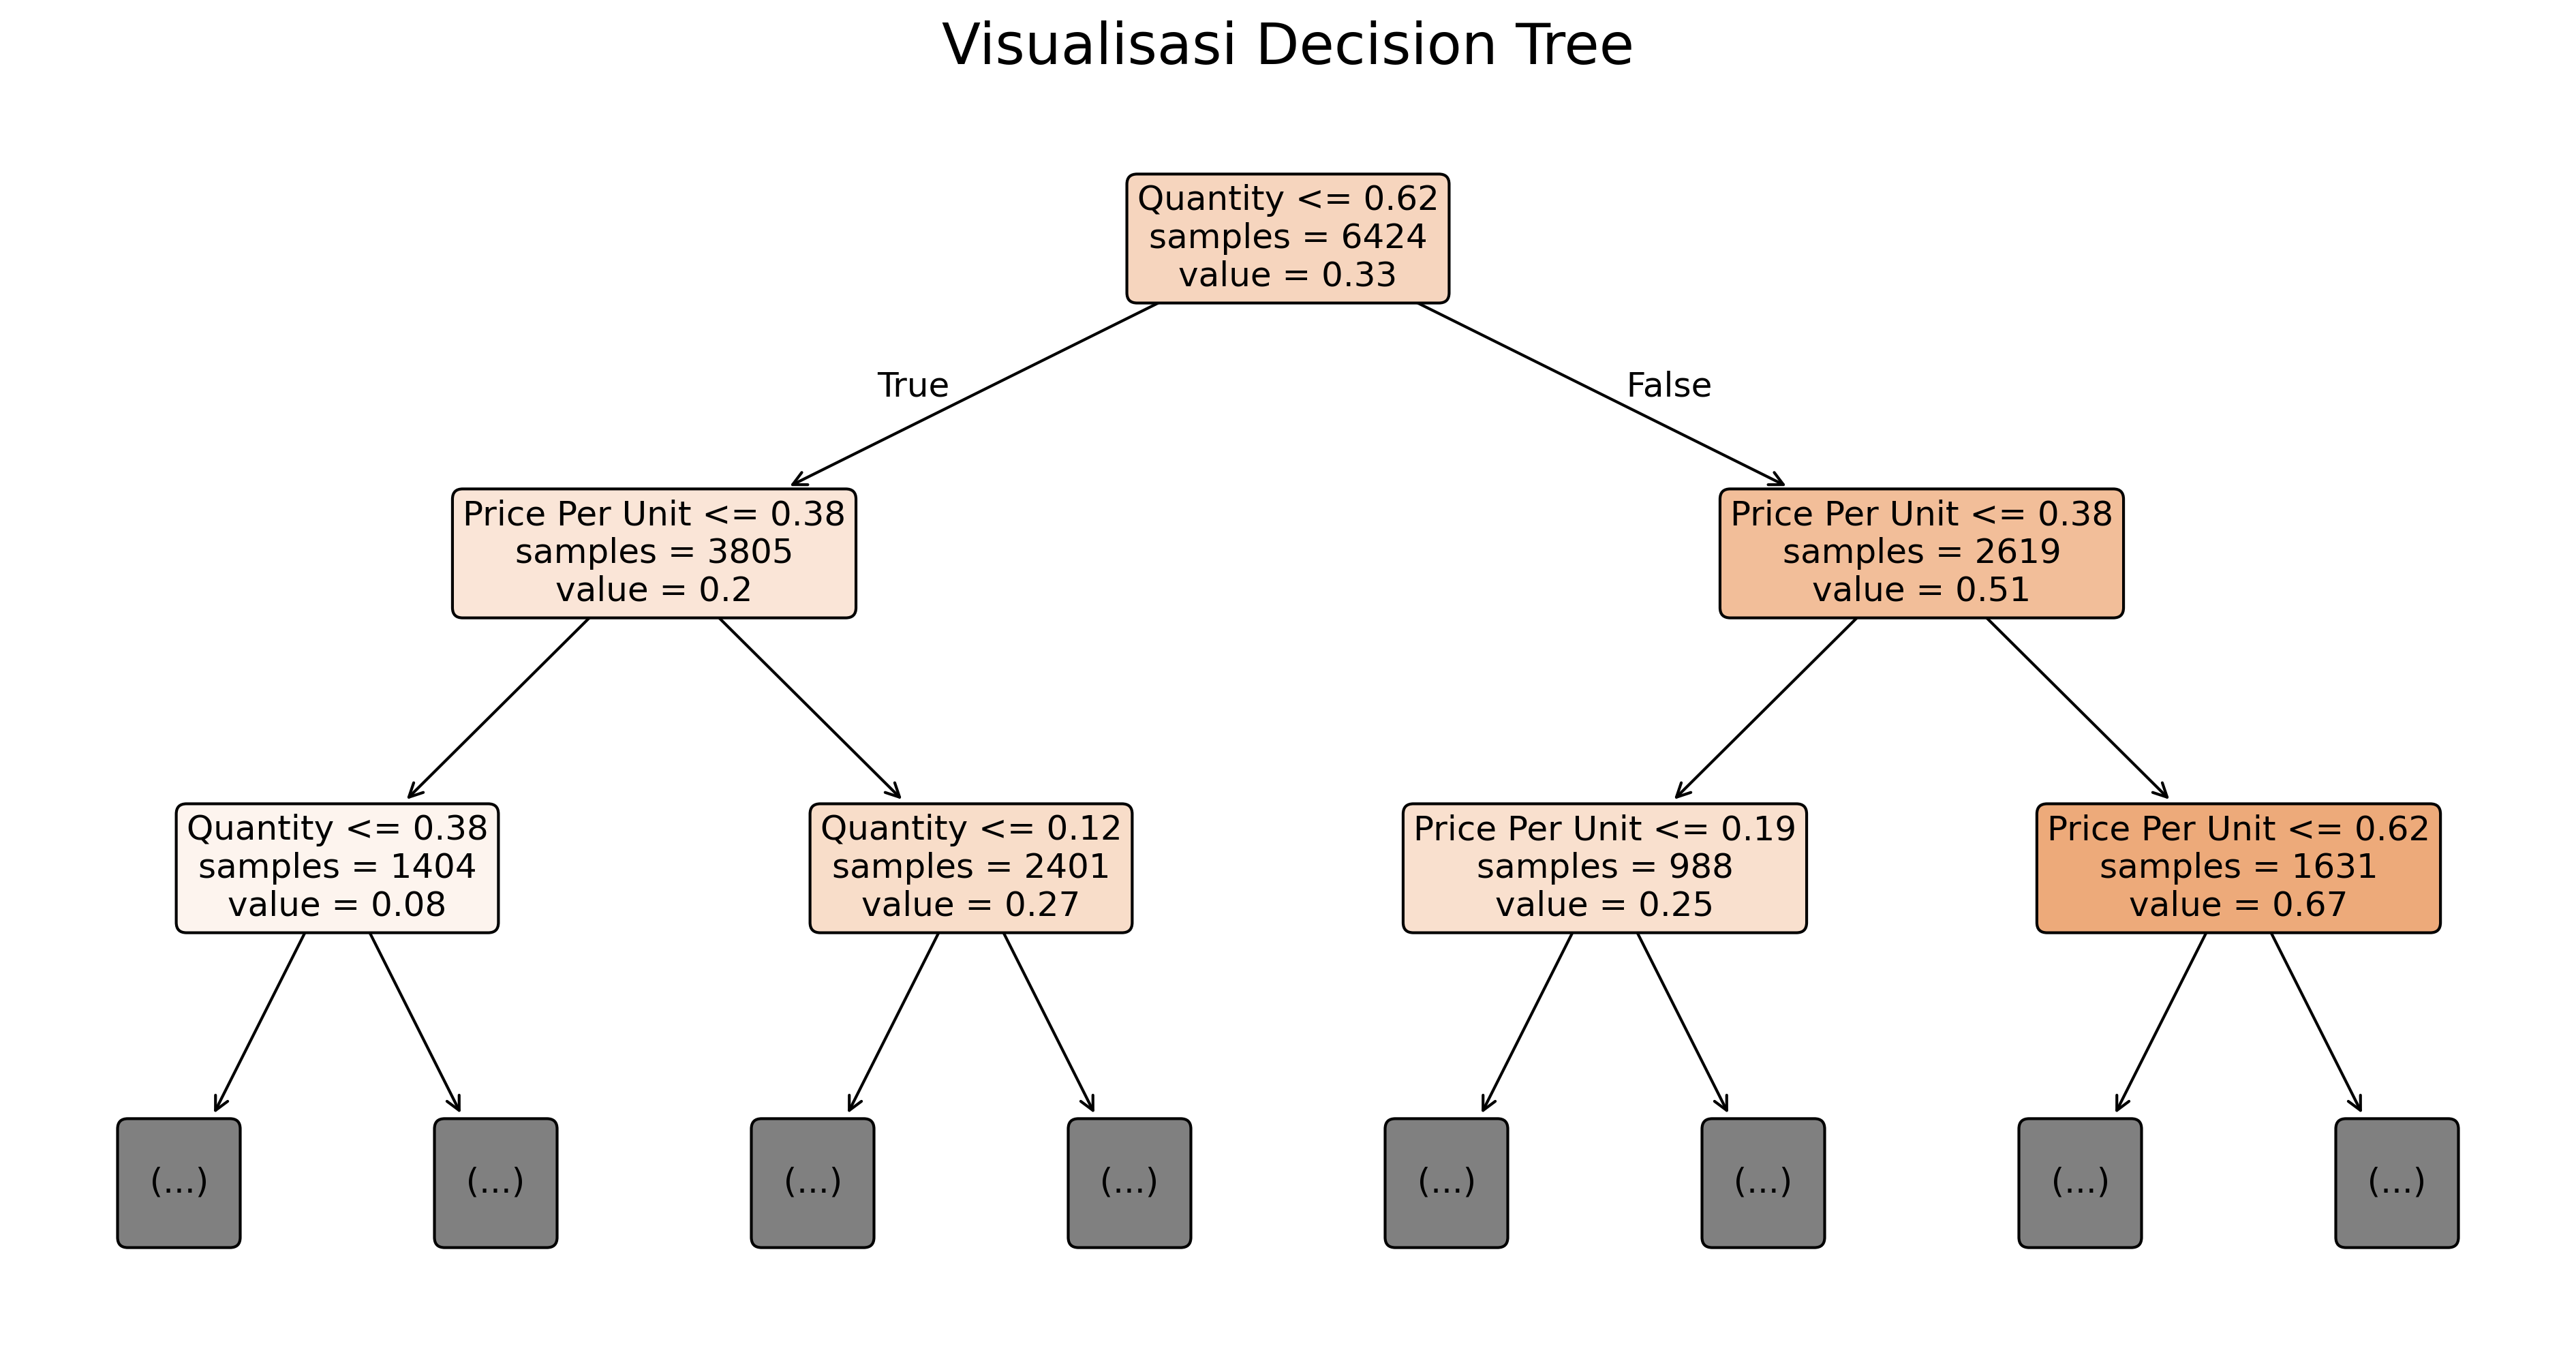

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1. Persiapan Data ---
# (Asumsi: DataFrame 'data_encoded' sudah ada dari proses sebelumnya)
print("Menyiapkan data...")
X = data_encoded[['Quantity', 'Price Per Unit']]
y = data_encoded['Total Spent']

# Bagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 2. Melatih Model ---
print("Melatih model Decision Tree...")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# --- 3. Prediksi dan Evaluasi ---
y_pred_dt = dt_model.predict(X_test)

print("\n--- Evaluasi Model Decision Tree ---")
print(f"MAE  (Mean Absolute Error): {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"MSE  (Mean Squared Error): {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R²   (Koefisien Determinasi): {r2_score(y_test, y_pred_dt):.2f}")

# ==============================================================================
# --- 4. FEATURE IMPORTANCE (Poin 1: Tingkat Kepentingan Fitur) ---
# ==============================================================================
print("\n--- Menghitung Feature Importance ---")
importance = dt_model.feature_importances_
feature_names = X.columns
print("\n")

# Buat DataFrame untuk melihat angkanya
feature_imp_df = pd.DataFrame({
    'Fitur': feature_names,
    'Pentingnya (Score)': importance
}).sort_values(by='Pentingnya (Score)', ascending=False)

print(feature_imp_df)

# Visualisasi Bar Chart Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_imp_df['Fitur'], feature_imp_df['Pentingnya (Score)'], color='teal')
plt.xlabel("Score Kepentingan (0-1)")
plt.title("Fitur Apa yang Paling Mempengaruhi Total Spent?")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
print("\n")
# ==============================================================================

# --- Visualisasi Decision Tree ---
plt.figure(figsize=(16, 8), dpi=300)

plot_tree(dt_model,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=2,
          impurity=False,
          precision=2)

plt.title("Visualisasi Decision Tree", fontsize=20)
plt.show()


# Analisis Hasil Decision Tree

Berikut adalah interpretasi dari 3 output yang dihasilkan di atas:

### 1. Evaluasi Performa Model
| Metrik | Skor | Interpretasi |
| :--- | :--- | :--- |
| **R² Score** | *(Lihat Output)* | Menunjukkan seberapa baik model menangkap pola data dibanding rata-rata. |
| **MAE** | *(Lihat Output)* | Rata-rata kesalahan prediksi dalam satuan mata uang asli. |

### 2. Feature Importance (Grafik Batang)
Grafik *Feature Importance* di atas menjawab pertanyaan bisnis: *"Apa yang paling mempengaruhi total belanja?"*

* **Batang Terpanjang:** Menunjukkan fitur paling krusial.
    * *Jika `Quantity` paling panjang:* Artinya volume pembelian lebih menentukan total harga daripada harga satuan barang itu sendiri.
    * *Jika `Price Per Unit` paling panjang:* Artinya harga barang lebih dominan.
* **Implikasi Bisnis:** Fokuskan strategi marketing pada fitur dengan batang terpanjang ini.

### 3. Visualisasi Pohon Keputusan
Gambar pohon (*Tree Plot*) di atas memperlihatkan "Pola Pikir" komputer:

* **Root Node (Kotak Paling Atas):** Ini adalah pertanyaan pertama dan terpenting yang diajukan model untuk memisahkan data.
    * *Contoh:* `X[0] <= 1.5` (Apakah Quantity kurang dari 1.5?)
* **Branches (Cabang):** Alur keputusan Ya/Tidak.
* **Leaf (Kotak Terbawah):** Nilai `value` di kotak ini adalah hasil prediksi `Total Spent`.

> **Kesimpulan Eksperimen:**
> Decision Tree memberikan keunggulan dalam **Interpretasi Visual**. Kita bisa melihat aturan main yang spesifik (misal: "Jika beli lebih dari 2 barang, maka prediksi harganya sekian").

# 5. Evaluation (Evaluasi Model)

Setelah model dilatih, kita menguji kinerjanya menggunakan data testing yang belum pernah dilihat model sebelumnya.

**Metrik Evaluasi:**
* **MAE (Mean Absolute Error):** Rata-rata kesalahan prediksi dalam satuan mata uang asli.
* **R² Score:** Seberapa baik model menjelaskan variasi data (skala 0-1).

---
### Kesimpulan Akhir & Rekomendasi
Dari hasil analisis dan pemodelan, disimpulkan bahwa:

1.  **Kualitas Model:** Model memiliki R² Score **0.91** (Sangat Baik), dengan rata-rata error prediksi hanya sekitar **+/- 1.29 mata uang**.
2.  **Faktor Kunci:** Jumlah barang (`Quantity`) adalah faktor terbesar yang mempengaruhi total belanja.
3.  **Rekomendasi Bisnis:**
    * Fokus pada promo *bundling* (beli banyak lebih murah) karena volume barang sangat mempengaruhi pendapatan.
    * Gunakan model ini untuk estimasi omzet harian guna efisiensi stok bahan baku.

--- Memulai Cross-Validation (10-Fold) ---

Linear Regression:
   Rata-rata R²: 0.9074
   Standar Deviasi: 0.0043
------------------------------
Ridge:
   Rata-rata R²: 0.9074
   Standar Deviasi: 0.0043
------------------------------
Lasso:
   Rata-rata R²: 0.9072
   Standar Deviasi: 0.0040
------------------------------
Decision Tree:
   Rata-rata R²: 1.0000
   Standar Deviasi: 0.0000
------------------------------


/tmp/ipython-input-2430908653.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


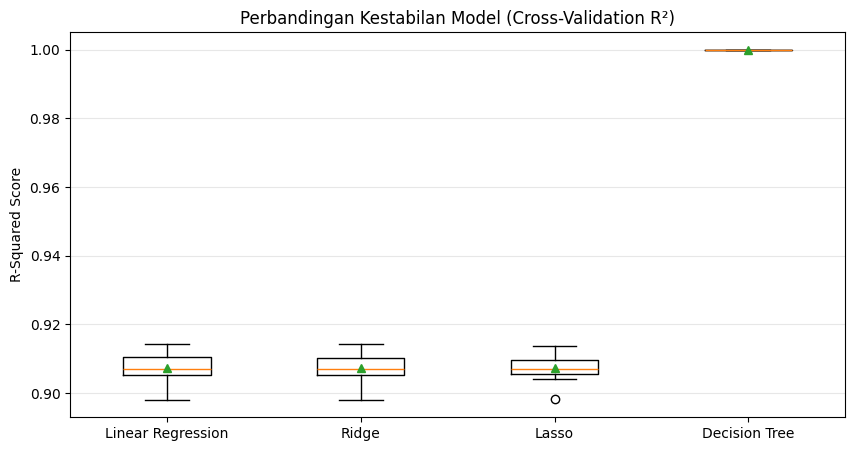


--- Analisis Distribusi Error (Linear Regression) ---


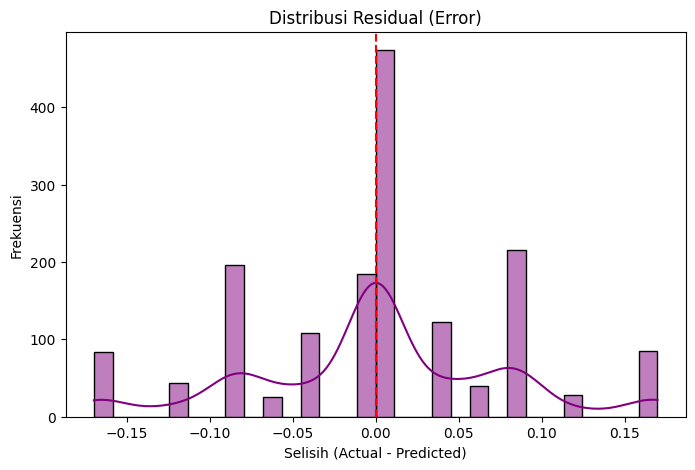

Insight:
- Jika grafik berbentuk lonceng (Distribusi Normal) berpusat di 0, model sangat baik.
- Jika condong ke kiri/kanan, model memiliki bias tertentu.

--- Interpretasi Bisnis ---
Range Total Spent Asli : 1.0 s/d 25.0
MAE (Skala 0-1)        : 0.0536
MAE (Nilai Asli)       : +/- 1.29

Kesimpulan: Rata-rata prediksi model meleset sekitar 1.29 mata uang dari nilai aslinya.

--- Menyimpan Model Terbaik ---
Model berhasil disimpan sebagai 'final_model_sales_prediction.pkl'.
Model ini siap digunakan untuk memprediksi Total Spent data baru.


In [ ]:
# ==============================================================================
# FASE 5: EVALUASI MENDALAM & PEMILIHAN MODEL TERBAIK
# ==============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
import joblib

# Pastikan X dan y sudah terdefinisi dari tahap sebelumnya
# Jika belum, jalankan ulang split data:
# X = data_encoded.drop(["Total Spent", "Transaction ID", "Transaction Date"], axis=1, errors='ignore')
# y = data_encoded["Total Spent"]

# ------------------------------------------------------------------------------
# 1. CROSS-VALIDATION (Uji Kestabilan Model)
# ------------------------------------------------------------------------------
# Kita akan menguji model 10 kali dengan pembagian data yang berbeda-beda
# untuk memastikan akurasi bukan kebetulan.

print("--- Memulai Cross-Validation (10-Fold) ---\n")

models = {
    "Linear Regression": model_linear,
    "Ridge": model_ridge,
    "Lasso": model_lasso,
    "Decision Tree": dt_model
}

results = []
names = []

for name, model in models.items():
    # K-Fold Cross Validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)

    # Menggunakan R-Squared sebagai scoring
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='r2')

    results.append(cv_results)
    names.append(name)

    print(f"{name}:")
    print(f"   Rata-rata R²: {cv_results.mean():.4f}")
    print(f"   Standar Deviasi: {cv_results.std():.4f}") # Semakin kecil semakin stabil
    print("-" * 30)

# Visualisasi Perbandingan Cross-Validation
plt.figure(figsize=(10, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Perbandingan Kestabilan Model (Cross-Validation R²)')
plt.ylabel('R-Squared Score')
plt.grid(axis='y', alpha=0.3)
plt.show()

# ------------------------------------------------------------------------------
# 2. ANALISIS DISTRIBUSI ERROR (RESIDUALS)
# ------------------------------------------------------------------------------
# Kita menggunakan model Linear Regression (sebagai model terbaik untuk generalisasi)
# untuk melihat apakah error berdistribusi normal (berbentuk lonceng).

print("\n--- Analisis Distribusi Error (Linear Regression) ---")

y_pred_best = model_linear.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribusi Residual (Error)')
plt.xlabel('Selisih (Actual - Predicted)')
plt.ylabel('Frekuensi')
plt.axvline(0, color='red', linestyle='--') # Garis nol (error ideal)
plt.show()

print("Insight:")
print("- Jika grafik berbentuk lonceng (Distribusi Normal) berpusat di 0, model sangat baik.")
print("- Jika condong ke kiri/kanan, model memiliki bias tertentu.\n")

# ------------------------------------------------------------------------------
# 3. SIMULASI INTERPRETASI BISNIS (DENORMALISASI)
# ------------------------------------------------------------------------------
# Karena data sudah dinormalisasi (0-1), error 0.05 itu terlihat kecil.
# Mari kita kembalikan ke nilai asli (Rupiah/Dollar) agar dimengerti bisnis.

# Mengambil min dan max dari data asli (sebelum normalisasi)
# Asumsi: Anda masih memiliki variabel 'data_clean' dari tahap cleaning sebelumnya
min_spent = data_clean['Total Spent'].min()
max_spent = data_clean['Total Spent'].max()

# Rumus Inverse MinMax: X_asli = X_scaled * (max - min) + min
mae_scaled = mean_absolute_error(y_test, y_pred_best)
mae_real = mae_scaled * (max_spent - min_spent)

print(f"--- Interpretasi Bisnis ---")
print(f"Range Total Spent Asli : {min_spent} s/d {max_spent}")
print(f"MAE (Skala 0-1)        : {mae_scaled:.4f}")
print(f"MAE (Nilai Asli)       : +/- {mae_real:.2f}")
print(f"\nKesimpulan: Rata-rata prediksi model meleset sekitar {mae_real:.2f} mata uang dari nilai aslinya.")

# ------------------------------------------------------------------------------
# 4. PENYIMPANAN MODEL (DEPLOYMENT READY)
# ------------------------------------------------------------------------------
# Kita simpan model terbaik (Linear Regression) untuk digunakan di aplikasi lain.

print("\n--- Menyimpan Model Terbaik ---")
filename = 'final_model_sales_prediction.pkl'
joblib.dump(model_linear, filename)
print(f"Model berhasil disimpan sebagai '{filename}'.")
print("Model ini siap digunakan untuk memprediksi Total Spent data baru.")